In [ ]:
import re
import nltk
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf

from collections import Counter
from wordcloud import WordCloud
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix, classification_report
from imblearn.under_sampling import RandomUnderSampler

In [2]:
data = pd.read_csv('iphone_clean.csv')
data

,productAsin,country,date,isVerified,ratingScore,reviewTitle,reviewDescription,reviewUrl,reviewedIn,variant,variantAsin,productVariant,productType
0,B09G9BL5CP,India,11-08-2024,True,4,No charger,"Every thing is good about iPhones, there's not...",https://www.amazon.in/gp/customer-reviews/R345...,Reviewed in India on 11 August 2024,Colour: MidnightSize: 256 GB,B09G9BQS98,Apple Iphone 13 (256 GB) - Midnight,Apple Iphone 13
1,B09G9BL5CP,India,16-08-2024,True,5,iPhone 13 256GB,"It look so fabulous, I am android user switche...",https://www.amazon.in/gp/customer-reviews/R2HJ...,Reviewed in India on 16 August 2024,Colour: MidnightSize: 256 GB,B09G9BQS98,Apple Iphone 13 (256 GB) - Midnight,Apple Iphone 13
2,B09G9BL5CP,India,14-05-2024,True,4,Flip camera option nill,I tried to flip camera while recording but no ...,https://www.amazon.in/gp/customer-reviews/R3Y7...,Reviewed in India on 14 May 2024,Colour: MidnightSize: 256 GB,B09G9BQS98,Apple Iphone 13 (256 GB) - Midnight,Apple Iphone 13
3,B09G9BL5CP,India,24-06-2024,True,5,Product,100% genuine,https://www.amazon.in/gp/customer-reviews/R1P9...,Reviewed in India on 24 June 2024,Colour: MidnightSize: 256 GB,B09G9BQS98,Apple Iphone 13 (256 GB) - Midnight,Apple Iphone 13
4,B09G9BL5CP,India,18-05-2024,True,5,Good product,Happy to get the iPhone 13 in Amazon offer,https://www.amazon.in/gp/customer-reviews/R1XI...,Reviewed in India on 18 May 2024,Colour: MidnightSize: 256 GB,B09G9BQS98,Apple Iphone 13 (256 GB) - Midnight,Apple Iphone 13
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2955,B09G9D8KRQ,India,11-10-2023,True,1,Very bad experience with i phone 13,Useless phon never buy this heat n useless cam...,https://www.amazon.in/gp/customer-reviews/R10O...,Reviewed in India on 11 October 2023,Colour: (PRODUCT) REDSize: 128 GB,B09G99CW2N,Apple Iphone 13 (128 GB) - Red,Apple Iphone 13
2956,B09G9D8KRQ,India,14-10-2022,True,2,not happy with this apple product,iam not happy with this product why because ch...,https://www.amazon.in/gp/customer-reviews/R2FW...,Reviewed in India on 14 October 2022,Colour: (PRODUCT) REDSize: 128 GB,B09G99CW2N,Apple Iphone 13 (128 GB) - Red,Apple Iphone 13
2957,B09G9D8KRQ,India,24-02-2022,True,3,Good phone,Good phone,https://www.amazon.in/gp/customer-reviews/R2C7...,Reviewed in India on 24 February 2022,Colour: (PRODUCT) REDSize: 128 GB,B09G99CW2N,Apple Iphone 13 (128 GB) - Red,Apple Iphone 13
2958,B09G9D8KRQ,India,16-10-2023,True,1,Battery discharge,While charging mobile it's getting so hot even...,https://www.amazon.in/gp/customer-reviews/R3K0...,Reviewed in India on 16 October 2023,Colour: (PRODUCT) REDSize: 128 GB,B09G99CW2N,Apple Iphone 13 (128 GB) - Red,Apple Iphone 13


In [3]:
# Daftar stopwords
stop_words_en = set(stopwords.words("english"))
stop_words_en.add('phone')
stop_words_en.add('iphone')
stop_words_en.add('got')
stop_words_en.add('one')
stop_words_en.add('use')
stop_words_en.add('events')
stop_words_en.add('even')
stop_words_en.add('get')
stop_words_en.add('amazon')
stop_words_en.add('also')
stop_words_en.add('product')

# Fungsi untuk membersihkan teks satu per satu
def clean_single_review(text):
    if pd.isnull(text):
        return ""
    text = re.sub(r"#[A-Za-z0-9]+", " ", text)
    text = re.sub(r"[^a-zA-Z\s]", " ", text)
    text = text.lower().strip()
    filtered_words = [word for word in text.split() if word not in stop_words_en]
    return " ".join(filtered_words)

# Terapkan fungsi ke setiap baris di kolom reviewDescription
data['reviewDescription_cleaned'] = data['reviewDescription'].apply(clean_single_review)

In [4]:
data.to_csv('iphone_review_cleaned.csv', index=False)

In [5]:
df = pd.read_csv("iphone_review_cleaned.csv")
df

,productAsin,country,date,isVerified,ratingScore,reviewTitle,reviewDescription,reviewUrl,reviewedIn,variant,variantAsin,productVariant,productType,reviewDescription_cleaned
0,B09G9BL5CP,India,11-08-2024,True,4,No charger,"Every thing is good about iPhones, there's not...",https://www.amazon.in/gp/customer-reviews/R345...,Reviewed in India on 11 August 2024,Colour: MidnightSize: 256 GB,B09G9BQS98,Apple Iphone 13 (256 GB) - Midnight,Apple Iphone 13,every thing good iphones nothing compared spee...
1,B09G9BL5CP,India,16-08-2024,True,5,iPhone 13 256GB,"It look so fabulous, I am android user switche...",https://www.amazon.in/gp/customer-reviews/R2HJ...,Reviewed in India on 16 August 2024,Colour: MidnightSize: 256 GB,B09G9BQS98,Apple Iphone 13 (256 GB) - Midnight,Apple Iphone 13,look fabulous android user switched apple perf...
2,B09G9BL5CP,India,14-05-2024,True,4,Flip camera option nill,I tried to flip camera while recording but no ...,https://www.amazon.in/gp/customer-reviews/R3Y7...,Reviewed in India on 14 May 2024,Colour: MidnightSize: 256 GB,B09G9BQS98,Apple Iphone 13 (256 GB) - Midnight,Apple Iphone 13,tried flip camera recording facility added pau...
3,B09G9BL5CP,India,24-06-2024,True,5,Product,100% genuine,https://www.amazon.in/gp/customer-reviews/R1P9...,Reviewed in India on 24 June 2024,Colour: MidnightSize: 256 GB,B09G9BQS98,Apple Iphone 13 (256 GB) - Midnight,Apple Iphone 13,genuine
4,B09G9BL5CP,India,18-05-2024,True,5,Good product,Happy to get the iPhone 13 in Amazon offer,https://www.amazon.in/gp/customer-reviews/R1XI...,Reviewed in India on 18 May 2024,Colour: MidnightSize: 256 GB,B09G9BQS98,Apple Iphone 13 (256 GB) - Midnight,Apple Iphone 13,happy offer
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2955,B09G9D8KRQ,India,11-10-2023,True,1,Very bad experience with i phone 13,Useless phon never buy this heat n useless cam...,https://www.amazon.in/gp/customer-reviews/R10O...,Reviewed in India on 11 October 2023,Colour: (PRODUCT) REDSize: 128 GB,B09G99CW2N,Apple Iphone 13 (128 GB) - Red,Apple Iphone 13,useless phon never buy heat n useless camera p...
2956,B09G9D8KRQ,India,14-10-2022,True,2,not happy with this apple product,iam not happy with this product why because ch...,https://www.amazon.in/gp/customer-reviews/R2FW...,Reviewed in India on 14 October 2022,Colour: (PRODUCT) REDSize: 128 GB,B09G99CW2N,Apple Iphone 13 (128 GB) - Red,Apple Iphone 13,iam happy charger provided apple extra burden ...
2957,B09G9D8KRQ,India,24-02-2022,True,3,Good phone,Good phone,https://www.amazon.in/gp/customer-reviews/R2C7...,Reviewed in India on 24 February 2022,Colour: (PRODUCT) REDSize: 128 GB,B09G99CW2N,Apple Iphone 13 (128 GB) - Red,Apple Iphone 13,good
2958,B09G9D8KRQ,India,16-10-2023,True,1,Battery discharge,While charging mobile it's getting so hot even...,https://www.amazon.in/gp/customer-reviews/R3K0...,Reviewed in India on 16 October 2023,Colour: (PRODUCT) REDSize: 128 GB,B09G99CW2N,Apple Iphone 13 (128 GB) - Red,Apple Iphone 13,charging mobile getting hot using mobile much ...


In [6]:
def plot_wordcloud(df, product_type_col='productType', text_col='reviewDescription_cleaned', target_type=None):

    if target_type is None:
        print("Harap masukkan nama productType.")
        return
    
    text_data = " ".join(df[df[product_type_col] == target_type][text_col].dropna().astype(str))
    if not text_data:
        print(f"Tidak ada data untuk {target_type}")
        return

    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text_data)
    
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.title(f"WordCloud - {target_type}")
    plt.show()


def plot_top20_words(df, product_type_col='productType', text_col='reviewDescription_cleaned', target_type=None):

    if target_type is None:
        print("Harap masukkan nama productType.")
        return

    text_data = " ".join(df[df[product_type_col] == target_type][text_col].dropna().astype(str))
    if not text_data:
        print(f"Tidak ada data untuk {target_type}")
        return

    word_counts = Counter(text_data.split())
    top_20 = word_counts.most_common(20)
    
    if not top_20:
        print(f"Tidak ada cukup kata untuk {target_type}")
        return

    words, counts = zip(*top_20)
    plt.figure(figsize=(12, 6))
    plt.bar(words, counts)
    plt.xticks(rotation=45)
    plt.title(f"Top 20 Words - {target_type}")
    plt.ylabel("Frequency")
    plt.xlabel("Words")
    plt.tight_layout()
    plt.show()

In [7]:
df["productType"].unique()

array(['Apple Iphone 13 ', 'Apple Iphone 15 ', 'Apple Iphone 14 '],
      dtype=object)

# **WordCloud Apple Iphone 13**

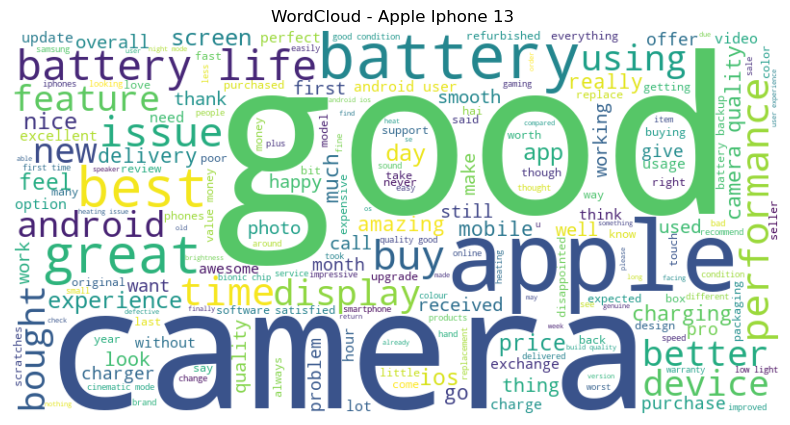

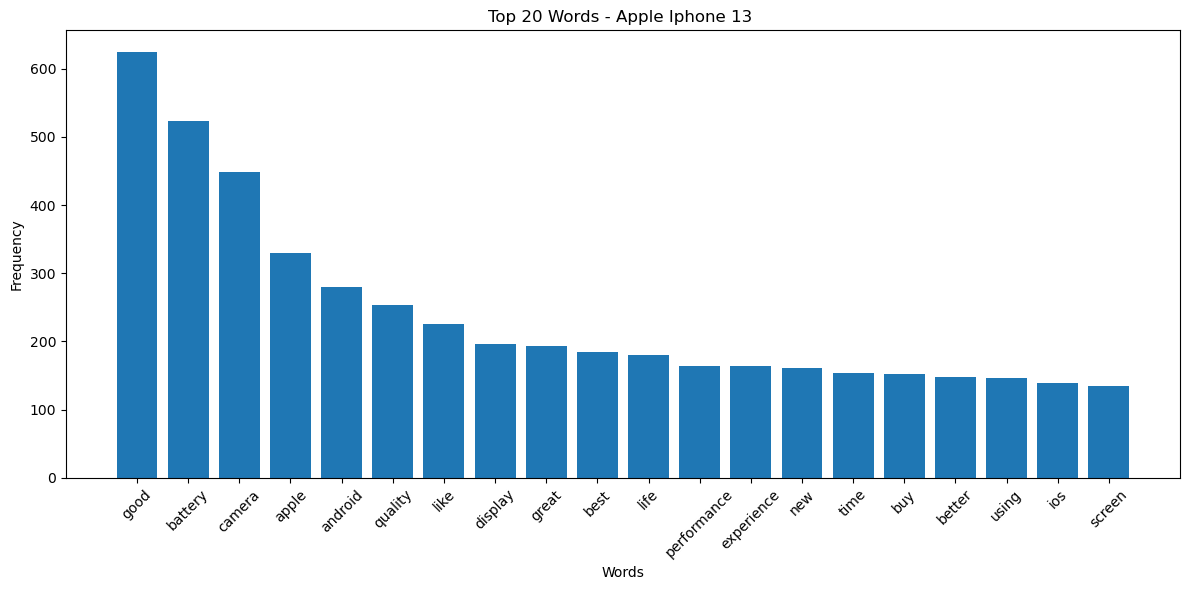

In [8]:
#iphone 13
plot_wordcloud(df, target_type="Apple Iphone 13 ")
plot_top20_words(df, target_type="Apple Iphone 13 ")

# **WordCloud Apple Iphone 14**

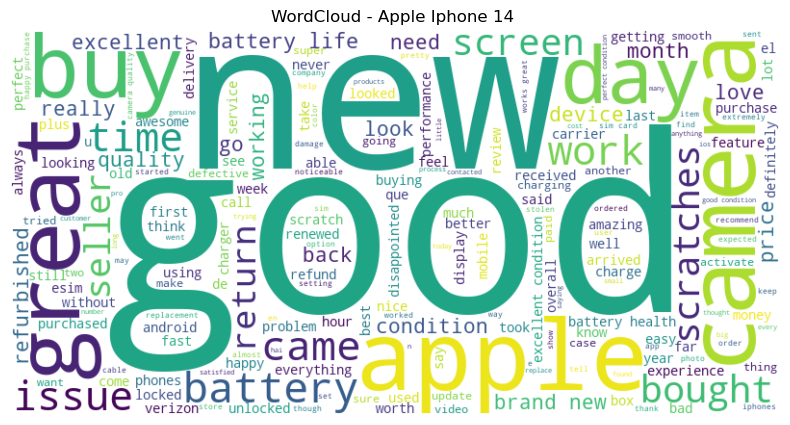

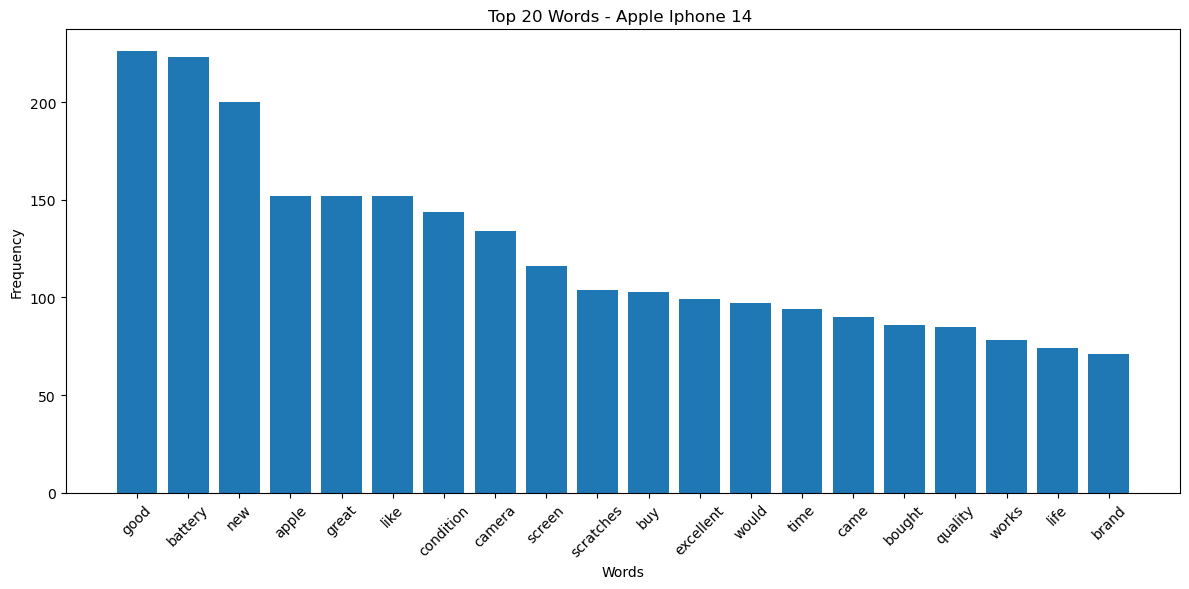

In [9]:
plot_wordcloud(df, target_type="Apple Iphone 14 ")
plot_top20_words(df, target_type="Apple Iphone 14 ")

# **WordCloud Iphone 15**

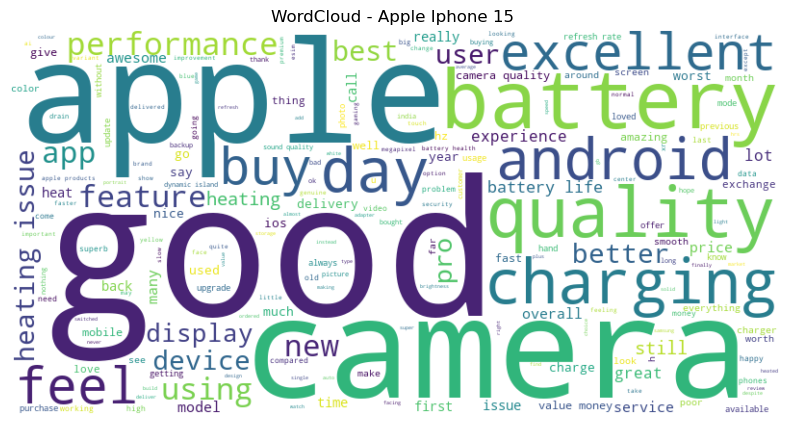

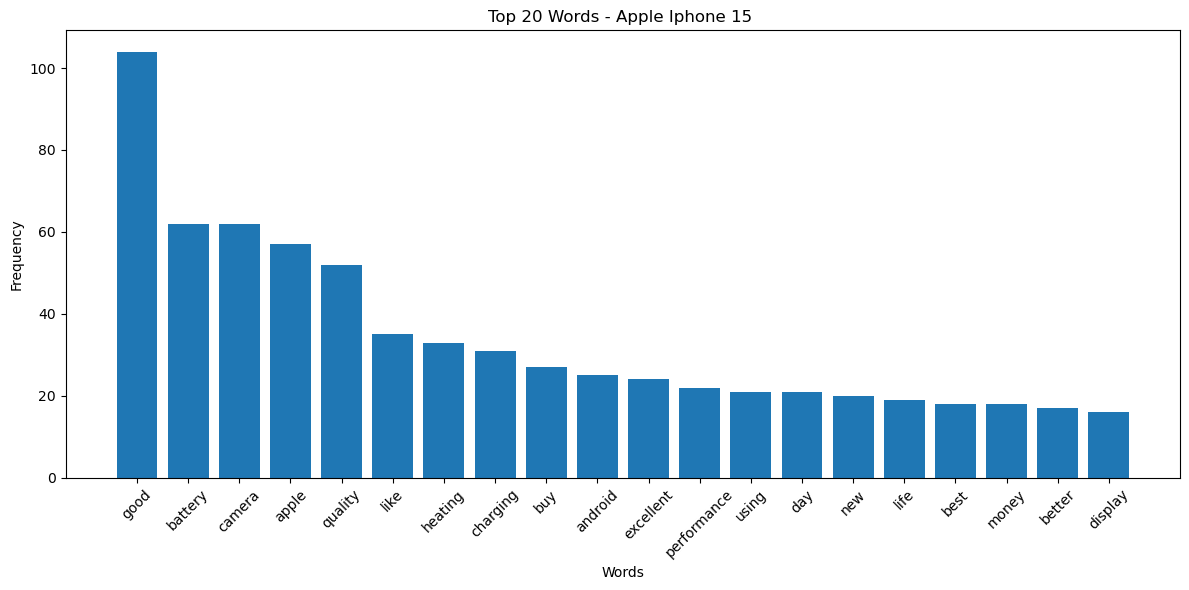

In [10]:
#iphone 15
plot_wordcloud(df, target_type="Apple Iphone 15 ")
plot_top20_words(df, target_type="Apple Iphone 15 ")

# **WordCloud Overall**

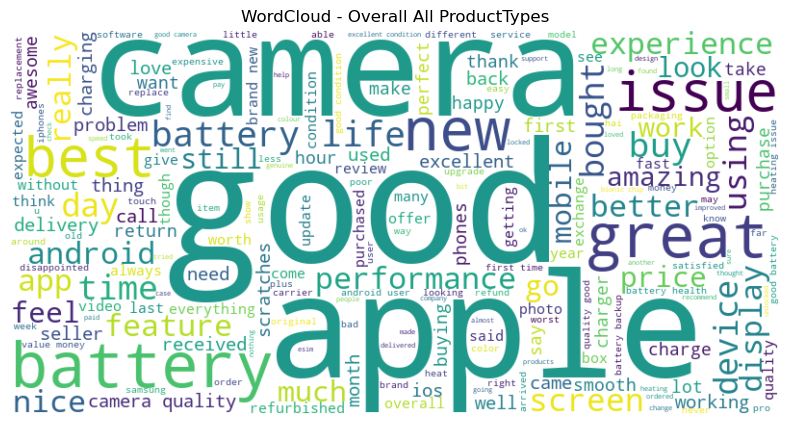

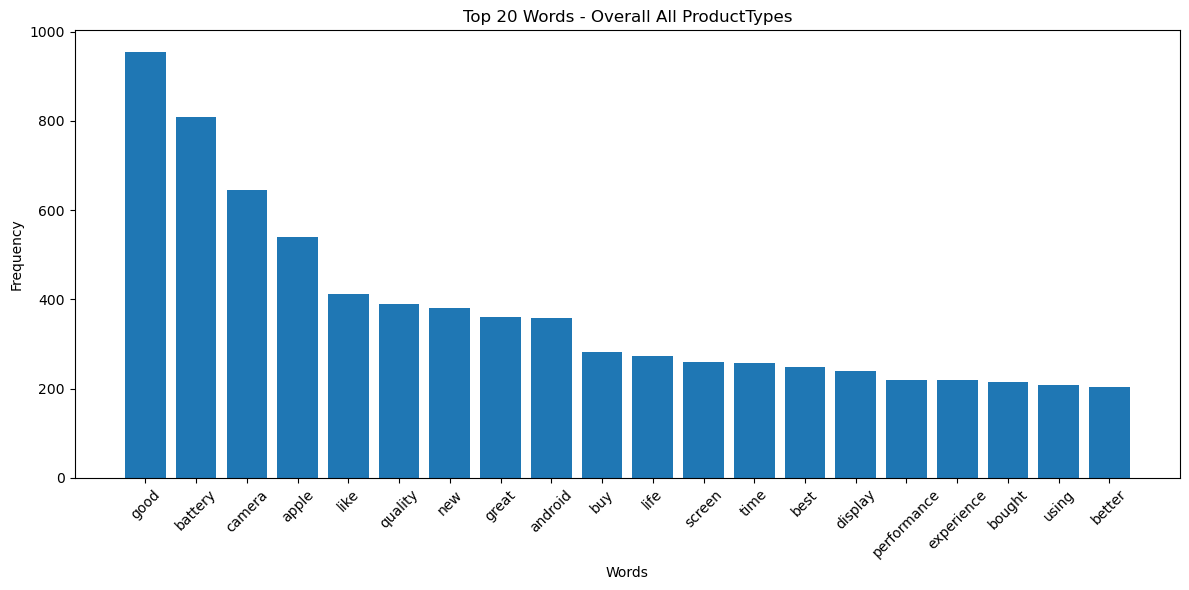

In [11]:
overall_text = " ".join(df["reviewDescription_cleaned"].dropna().astype(str))

overall_word_counts = Counter(overall_text.split())
overall_top_20 = overall_word_counts.most_common(20)

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(overall_text)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("WordCloud - Overall All ProductTypes")
plt.show()

words, counts = zip(*overall_top_20)
plt.figure(figsize=(12, 6))
plt.bar(words, counts)
plt.xticks(rotation=45)
plt.title("Top 20 Words - Overall All ProductTypes")
plt.ylabel("Frequency")
plt.xlabel("Words")
plt.tight_layout()
plt.show()

In [12]:
# Filter baris yang mengandung kata tertentu
got_rows = df[df["reviewDescription"].str.contains(r"\bday\b", case=False, na=False)]

got_rows[["reviewDescription"]].head(20)

,reviewDescription
18,There’s no same day delivery Phone was deliver...
24,This phone has well balanced HD oled sDisplay....
27,Actually I’m android user now switched to iPho...
40,Things I liked:1. Solid Build Quality and very...
43,IOS 17.5 (current version updated from 16.6)Th...
46,Writing this review after using the phone for ...
51,"The iPhone 13 is, without a doubt, a game-chan..."
74,The iPhone 13 128GB has surpassed my expectati...
76,I snagged the iPhone 13 during the Great India...
77,Here's a review for the iPhone 13 128GB in Mid...


In [ ]:
# Filter baris yang mengandung kata "day" dan berasal dari produk "Apple Iphone 15"
filtered_rows = df[
    (df["productType"].str.contains("Apple Iphone 13 ", case=False, na=False)) &
    (df["reviewDescription"].str.contains(r"\bday\b", case=False, na=False))
]

# Tampilkan 20 baris pertama dari hasil filter
filtered_rows[["productType", "reviewDescription"]].head(20)

,productType,reviewDescription
18,Apple Iphone 13,There’s no same day delivery Phone was deliver...
24,Apple Iphone 13,This phone has well balanced HD oled sDisplay....
27,Apple Iphone 13,Actually I’m android user now switched to iPho...
40,Apple Iphone 13,Things I liked:1. Solid Build Quality and very...
43,Apple Iphone 13,IOS 17.5 (current version updated from 16.6)Th...
46,Apple Iphone 13,Writing this review after using the phone for ...
51,Apple Iphone 13,"The iPhone 13 is, without a doubt, a game-chan..."
74,Apple Iphone 13,The iPhone 13 128GB has surpassed my expectati...
76,Apple Iphone 13,I snagged the iPhone 13 during the Great India...
77,Apple Iphone 13,Here's a review for the iPhone 13 128GB in Mid...


# Add RatingScore Category

In [19]:
def classify_rating(score):
    if score in [5]:
        return 'Excellent'
    elif score in [4]:
        return 'Very Good'
    elif score in [3]:
        return 'Neutral'
    elif score in [2]:
        return 'Fair'
    else:
        return 'Poor'

df[''] = df['ratingScore'].apply(classify_rating)
df

,productAsin,country,date,isVerified,ratingScore,reviewTitle,reviewDescription,reviewUrl,reviewedIn,variant,variantAsin,productVariant,productType,reviewDescription_cleaned,
0,B09G9BL5CP,India,11-08-2024,True,4,No charger,"Every thing is good about iPhones, there's not...",https://www.amazon.in/gp/customer-reviews/R345...,Reviewed in India on 11 August 2024,Colour: MidnightSize: 256 GB,B09G9BQS98,Apple Iphone 13 (256 GB) - Midnight,Apple Iphone 13,every thing good iphones nothing compared spee...,Very Good
1,B09G9BL5CP,India,16-08-2024,True,5,iPhone 13 256GB,"It look so fabulous, I am android user switche...",https://www.amazon.in/gp/customer-reviews/R2HJ...,Reviewed in India on 16 August 2024,Colour: MidnightSize: 256 GB,B09G9BQS98,Apple Iphone 13 (256 GB) - Midnight,Apple Iphone 13,look fabulous android user switched apple perf...,Excellent
2,B09G9BL5CP,India,14-05-2024,True,4,Flip camera option nill,I tried to flip camera while recording but no ...,https://www.amazon.in/gp/customer-reviews/R3Y7...,Reviewed in India on 14 May 2024,Colour: MidnightSize: 256 GB,B09G9BQS98,Apple Iphone 13 (256 GB) - Midnight,Apple Iphone 13,tried flip camera recording facility added pau...,Very Good
3,B09G9BL5CP,India,24-06-2024,True,5,Product,100% genuine,https://www.amazon.in/gp/customer-reviews/R1P9...,Reviewed in India on 24 June 2024,Colour: MidnightSize: 256 GB,B09G9BQS98,Apple Iphone 13 (256 GB) - Midnight,Apple Iphone 13,genuine,Excellent
4,B09G9BL5CP,India,18-05-2024,True,5,Good product,Happy to get the iPhone 13 in Amazon offer,https://www.amazon.in/gp/customer-reviews/R1XI...,Reviewed in India on 18 May 2024,Colour: MidnightSize: 256 GB,B09G9BQS98,Apple Iphone 13 (256 GB) - Midnight,Apple Iphone 13,happy offer,Excellent
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2955,B09G9D8KRQ,India,11-10-2023,True,1,Very bad experience with i phone 13,Useless phon never buy this heat n useless cam...,https://www.amazon.in/gp/customer-reviews/R10O...,Reviewed in India on 11 October 2023,Colour: (PRODUCT) REDSize: 128 GB,B09G99CW2N,Apple Iphone 13 (128 GB) - Red,Apple Iphone 13,useless phon never buy heat n useless camera p...,Poor
2956,B09G9D8KRQ,India,14-10-2022,True,2,not happy with this apple product,iam not happy with this product why because ch...,https://www.amazon.in/gp/customer-reviews/R2FW...,Reviewed in India on 14 October 2022,Colour: (PRODUCT) REDSize: 128 GB,B09G99CW2N,Apple Iphone 13 (128 GB) - Red,Apple Iphone 13,iam happy charger provided apple extra burden ...,Fair
2957,B09G9D8KRQ,India,24-02-2022,True,3,Good phone,Good phone,https://www.amazon.in/gp/customer-reviews/R2C7...,Reviewed in India on 24 February 2022,Colour: (PRODUCT) REDSize: 128 GB,B09G99CW2N,Apple Iphone 13 (128 GB) - Red,Apple Iphone 13,good,Neutral
2958,B09G9D8KRQ,India,16-10-2023,True,1,Battery discharge,While charging mobile it's getting so hot even...,https://www.amazon.in/gp/customer-reviews/R3K0...,Reviewed in India on 16 October 2023,Colour: (PRODUCT) REDSize: 128 GB,B09G99CW2N,Apple Iphone 13 (128 GB) - Red,Apple Iphone 13,charging mobile getting hot using mobile much ...,Poor


In [20]:
df

,productAsin,country,date,isVerified,ratingScore,reviewTitle,reviewDescription,reviewUrl,reviewedIn,variant,variantAsin,productVariant,productType,reviewDescription_cleaned,
0,B09G9BL5CP,India,11-08-2024,True,4,No charger,"Every thing is good about iPhones, there's not...",https://www.amazon.in/gp/customer-reviews/R345...,Reviewed in India on 11 August 2024,Colour: MidnightSize: 256 GB,B09G9BQS98,Apple Iphone 13 (256 GB) - Midnight,Apple Iphone 13,every thing good iphones nothing compared spee...,Very Good
1,B09G9BL5CP,India,16-08-2024,True,5,iPhone 13 256GB,"It look so fabulous, I am android user switche...",https://www.amazon.in/gp/customer-reviews/R2HJ...,Reviewed in India on 16 August 2024,Colour: MidnightSize: 256 GB,B09G9BQS98,Apple Iphone 13 (256 GB) - Midnight,Apple Iphone 13,look fabulous android user switched apple perf...,Excellent
2,B09G9BL5CP,India,14-05-2024,True,4,Flip camera option nill,I tried to flip camera while recording but no ...,https://www.amazon.in/gp/customer-reviews/R3Y7...,Reviewed in India on 14 May 2024,Colour: MidnightSize: 256 GB,B09G9BQS98,Apple Iphone 13 (256 GB) - Midnight,Apple Iphone 13,tried flip camera recording facility added pau...,Very Good
3,B09G9BL5CP,India,24-06-2024,True,5,Product,100% genuine,https://www.amazon.in/gp/customer-reviews/R1P9...,Reviewed in India on 24 June 2024,Colour: MidnightSize: 256 GB,B09G9BQS98,Apple Iphone 13 (256 GB) - Midnight,Apple Iphone 13,genuine,Excellent
4,B09G9BL5CP,India,18-05-2024,True,5,Good product,Happy to get the iPhone 13 in Amazon offer,https://www.amazon.in/gp/customer-reviews/R1XI...,Reviewed in India on 18 May 2024,Colour: MidnightSize: 256 GB,B09G9BQS98,Apple Iphone 13 (256 GB) - Midnight,Apple Iphone 13,happy offer,Excellent
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2955,B09G9D8KRQ,India,11-10-2023,True,1,Very bad experience with i phone 13,Useless phon never buy this heat n useless cam...,https://www.amazon.in/gp/customer-reviews/R10O...,Reviewed in India on 11 October 2023,Colour: (PRODUCT) REDSize: 128 GB,B09G99CW2N,Apple Iphone 13 (128 GB) - Red,Apple Iphone 13,useless phon never buy heat n useless camera p...,Poor
2956,B09G9D8KRQ,India,14-10-2022,True,2,not happy with this apple product,iam not happy with this product why because ch...,https://www.amazon.in/gp/customer-reviews/R2FW...,Reviewed in India on 14 October 2022,Colour: (PRODUCT) REDSize: 128 GB,B09G99CW2N,Apple Iphone 13 (128 GB) - Red,Apple Iphone 13,iam happy charger provided apple extra burden ...,Fair
2957,B09G9D8KRQ,India,24-02-2022,True,3,Good phone,Good phone,https://www.amazon.in/gp/customer-reviews/R2C7...,Reviewed in India on 24 February 2022,Colour: (PRODUCT) REDSize: 128 GB,B09G99CW2N,Apple Iphone 13 (128 GB) - Red,Apple Iphone 13,good,Neutral
2958,B09G9D8KRQ,India,16-10-2023,True,1,Battery discharge,While charging mobile it's getting so hot even...,https://www.amazon.in/gp/customer-reviews/R3K0...,Reviewed in India on 16 October 2023,Colour: (PRODUCT) REDSize: 128 GB,B09G99CW2N,Apple Iphone 13 (128 GB) - Red,Apple Iphone 13,charging mobile getting hot using mobile much ...,Poor


In [ ]:
# Filter khusus Apple Iphone 13 dengan rating 3
df_iphone13_rating3 = df[(df['ratingScore'] == 3) & (df['productType'] == 'Apple Iphone 13 ')]

# Tampilkan hasil
df_iphone13_rating3                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                -re

,productAsin,country,date,isVerified,ratingScore,reviewTitle,reviewDescription,reviewUrl,reviewedIn,variant,variantAsin,productVariant,productType,reviewDescription_cleaned,
16,B09G9BL5CP,India,31-10-2023,True,3,It's been a week since I've been using this phone,Works just fine nothing special the camera is ...,https://www.amazon.in/gp/customer-reviews/R2WH...,Reviewed in India on 31 October 2023,Colour: PinkSize: 256 GB,B09G9HRYFZ,Apple Iphone 13 (256 GB) - Pink,Apple Iphone 13,works fine nothing special camera good night e...,Neutral
21,B09G9BL5CP,India,25-06-2024,True,3,Not worth,Not worth,https://www.amazon.in/gp/customer-reviews/R3S8...,Reviewed in India on 25 June 2024,Colour: BlueSize: 256 GB,B09G93H3BR,Apple Iphone 13 (256 GB) - Blue,Apple Iphone 13,worth,Neutral
22,B09G9BL5CP,India,12-05-2024,True,3,Improved version of iPhone 11,Nothing new features only model changed,https://www.amazon.in/gp/customer-reviews/R2QO...,Reviewed in India on 12 May 2024,Colour: BlueSize: 256 GB,B09G93H3BR,Apple Iphone 13 (256 GB) - Blue,Apple Iphone 13,nothing new features model changed,Neutral
37,B09G9BL5CP,India,06-11-2023,True,3,"Not that great deal. Battery performance, heat...","Facing heating issue, Battery performance is n...",https://www.amazon.in/gp/customer-reviews/R25O...,Reviewed in India on 6 November 2023,Colour: GreenSize: 256 GB,B09V4MXBSN,Apple Iphone 13 (256 GB) - Green,Apple Iphone 13,facing heating issue battery performance good ...,Neutral
43,B09G9BL5CP,India,20-10-2023,True,3,feel good yet(6 month),IOS 17.5 (current version updated from 16.6)Th...,https://www.amazon.in/gp/customer-reviews/R2CT...,Reviewed in India on 20 October 2023,Colour: PinkSize: 128 GB,B09G9FPGTN,Apple Iphone 13 (128 GB) - Pink,Apple Iphone 13,ios current version updated thw worst thing io...,Neutral
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2937,B09G9D8KRQ,India,10-10-2023,True,3,Charging adopter is not rece,Charging adopters not received,https://www.amazon.in/gp/customer-reviews/R2UN...,Reviewed in India on 10 October 2023,Colour: BlueSize: 128 GB,B09G9BL5CP,Apple Iphone 13 (128 GB) - Blue,Apple Iphone 13,charging adopters received,Neutral
2944,B09G9D8KRQ,India,16-06-2022,True,3,missing earphone and charger😅,overall good product but somewhere price sucks...,https://www.amazon.in/gp/customer-reviews/R16I...,Reviewed in India on 16 June 2022,Colour: PinkSize: 128 GB,B09G9FPGTN,Apple Iphone 13 (128 GB) - Pink,Apple Iphone 13,overall good somewhere price sucks realise cha...,Neutral
2949,B09G9D8KRQ,India,11-09-2022,True,3,"Key tab is not working properly, need to chan...",iPhone is not working properly screen tuch sen...,https://www.amazon.in/gp/customer-reviews/R10S...,Reviewed in India on 11 September 2022,Colour: PinkSize: 128 GB,B09G9FPGTN,Apple Iphone 13 (128 GB) - Pink,Apple Iphone 13,working properly screen tuch sence poor thank ...,Neutral
2953,B09G9D8KRQ,India,11-08-2022,True,3,Not justified with price,"I faced heating issues, bulky not recommended",https://www.amazon.in/gp/customer-reviews/RHLD...,Reviewed in India on 11 August 2022,Colour: (PRODUCT) REDSize: 128 GB,B09G99CW2N,Apple Iphone 13 (128 GB) - Red,Apple Iphone 13,faced heating issues bulky recommended,Neutral


In [14]:
df.to_csv('iphone_review_cleaned.csv', index=False)

In [15]:
df

,productAsin,country,date,isVerified,ratingScore,reviewTitle,reviewDescription,reviewUrl,reviewedIn,variant,variantAsin,productVariant,productType,reviewDescription_cleaned,
0,B09G9BL5CP,India,11-08-2024,True,4,No charger,"Every thing is good about iPhones, there's not...",https://www.amazon.in/gp/customer-reviews/R345...,Reviewed in India on 11 August 2024,Colour: MidnightSize: 256 GB,B09G9BQS98,Apple Iphone 13 (256 GB) - Midnight,Apple Iphone 13,every thing good iphones nothing compared spee...,Very Good
1,B09G9BL5CP,India,16-08-2024,True,5,iPhone 13 256GB,"It look so fabulous, I am android user switche...",https://www.amazon.in/gp/customer-reviews/R2HJ...,Reviewed in India on 16 August 2024,Colour: MidnightSize: 256 GB,B09G9BQS98,Apple Iphone 13 (256 GB) - Midnight,Apple Iphone 13,look fabulous android user switched apple perf...,Excellent
2,B09G9BL5CP,India,14-05-2024,True,4,Flip camera option nill,I tried to flip camera while recording but no ...,https://www.amazon.in/gp/customer-reviews/R3Y7...,Reviewed in India on 14 May 2024,Colour: MidnightSize: 256 GB,B09G9BQS98,Apple Iphone 13 (256 GB) - Midnight,Apple Iphone 13,tried flip camera recording facility added pau...,Very Good
3,B09G9BL5CP,India,24-06-2024,True,5,Product,100% genuine,https://www.amazon.in/gp/customer-reviews/R1P9...,Reviewed in India on 24 June 2024,Colour: MidnightSize: 256 GB,B09G9BQS98,Apple Iphone 13 (256 GB) - Midnight,Apple Iphone 13,genuine,Excellent
4,B09G9BL5CP,India,18-05-2024,True,5,Good product,Happy to get the iPhone 13 in Amazon offer,https://www.amazon.in/gp/customer-reviews/R1XI...,Reviewed in India on 18 May 2024,Colour: MidnightSize: 256 GB,B09G9BQS98,Apple Iphone 13 (256 GB) - Midnight,Apple Iphone 13,happy offer,Excellent
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2955,B09G9D8KRQ,India,11-10-2023,True,1,Very bad experience with i phone 13,Useless phon never buy this heat n useless cam...,https://www.amazon.in/gp/customer-reviews/R10O...,Reviewed in India on 11 October 2023,Colour: (PRODUCT) REDSize: 128 GB,B09G99CW2N,Apple Iphone 13 (128 GB) - Red,Apple Iphone 13,useless phon never buy heat n useless camera p...,Poor
2956,B09G9D8KRQ,India,14-10-2022,True,2,not happy with this apple product,iam not happy with this product why because ch...,https://www.amazon.in/gp/customer-reviews/R2FW...,Reviewed in India on 14 October 2022,Colour: (PRODUCT) REDSize: 128 GB,B09G99CW2N,Apple Iphone 13 (128 GB) - Red,Apple Iphone 13,iam happy charger provided apple extra burden ...,Fair
2957,B09G9D8KRQ,India,24-02-2022,True,3,Good phone,Good phone,https://www.amazon.in/gp/customer-reviews/R2C7...,Reviewed in India on 24 February 2022,Colour: (PRODUCT) REDSize: 128 GB,B09G99CW2N,Apple Iphone 13 (128 GB) - Red,Apple Iphone 13,good,Neutral
2958,B09G9D8KRQ,India,16-10-2023,True,1,Battery discharge,While charging mobile it's getting so hot even...,https://www.amazon.in/gp/customer-reviews/R3K0...,Reviewed in India on 16 October 2023,Colour: (PRODUCT) REDSize: 128 GB,B09G99CW2N,Apple Iphone 13 (128 GB) - Red,Apple Iphone 13,charging mobile getting hot using mobile much ...,Poor


In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2960 entries, 0 to 2959
Data columns (total 15 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   productAsin                2960 non-null   object
 1   country                    2960 non-null   object
 2   date                       2960 non-null   object
 3   isVerified                 2960 non-null   bool  
 4   ratingScore                2960 non-null   int64 
 5   reviewTitle                2960 non-null   object
 6   reviewDescription          2960 non-null   object
 7   reviewUrl                  2960 non-null   object
 8   reviewedIn                 2960 non-null   object
 9   variant                    2960 non-null   object
 10  variantAsin                2960 non-null   object
 11  productVariant             2960 non-null   object
 12  productType                2960 non-null   object
 13  reviewDescription_cleaned  2928 non-null   object
 14          

# **EDA**

## **Most Review productType**

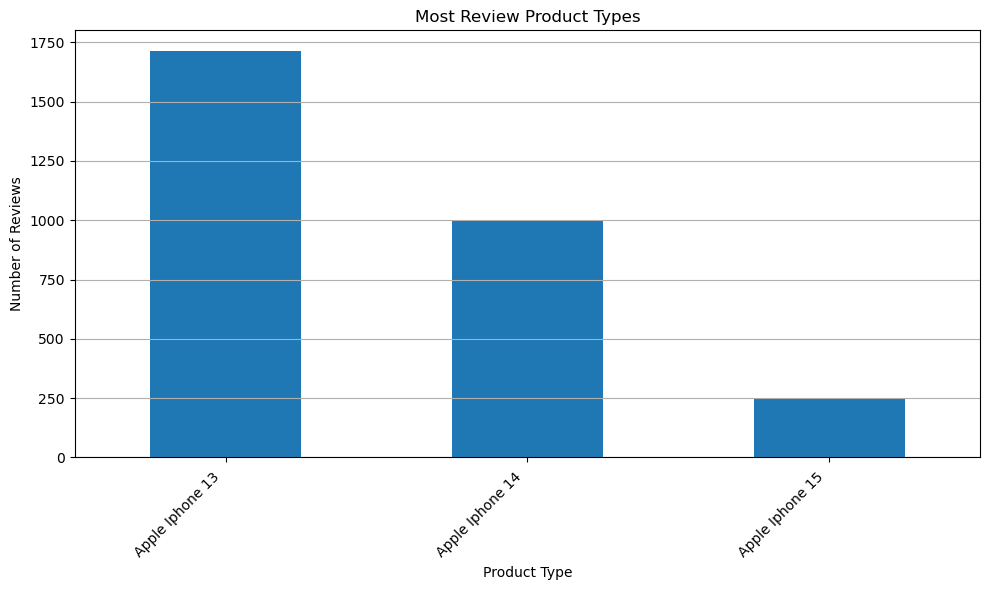

In [ ]:
# Count top selling product types 
top_product_types = df['productType'].value_counts().sort_values(ascending=False)

# Plotting the bar chart
plt.figure(figsize=(10, 6))
top_product_types.plot(kind='bar')
plt.title("Most Review Product Types")
plt.xlabel("Product Type")
plt.ylabel("Number of Reviews")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.grid(axis='y')
plt.show()

In [ ]:
# Filter masing-masing iPhone
iphone13 = df[df['productType'] == 'Apple Iphone 13 ']['reviewDescription'].reset_index(drop=True)
iphone14 = df[df['productType'] == 'Apple Iphone 14 ']['reviewDescription'].reset_index(drop=True)
iphone15 = df[df['productType'] == 'Apple Iphone 15 ']['reviewDescription'].reset_index(drop=True)

# Samakan jumlah baris (pakai panjang terpendek agar seimbang).
min_len = min(len(iphone13), len(iphone14), len(iphone15))

# Gabungkan jadi satu DataFrame
comparison_df = pd.DataFrame({
    'iPhone 13 Reviews': iphone13[:min_len],
    'iPhone 14 Reviews': iphone14[:min_len],
    'iPhone 15 Reviews': iphone15[:min_len],
})

# Tampilkan
comparison_df.head(10)

,iPhone 13 Reviews,iPhone 14 Reviews,iPhone 15 Reviews
0,"Every thing is good about iPhones, there's not...",The what's up is getting hanged and when I am ...,Love it
1,"It look so fabulous, I am android user switche...",New I phone 14 256 charging ke time bahut heat...,Sound quality is very good. Performance is goo...
2,I tried to flip camera while recording but no ...,all are ok but camera it very poor quality ba...,100% ok
3,100% genuine,"iPhone is already broken when it got here, als...",it’s the best smart phone ( based on personal ...
4,Happy to get the iPhone 13 in Amazon offer,Good performance,Excellent phone
5,5 star 👍,Quality is goodAnd what else need to say about...,Ph acha h but 60 hz k refresh rate bahut slow ...
6,"Great Product... Nothing to say, as the Name A...",Nice,Everything is better than my iPhone 12 except ...
7,Good product 😀💯,"The phone is good ,has nice camera quality and...","If you don’t like using big sized phone , go f..."
8,Nice product,"Loved it ,new colour is really special",Phone is overall a beast specially in terms of...
9,Excellent product,The mobile is awesome but made fewer upgradati...,I was using iPhone 13 and switching to 15 was ...


Terlihat bahwa Iphone 13 mendapatkan review terbanyak dengan total review sebanyak hampir 1750 diikuti oleh Iphone 14 sejumlah 1000 review dan Iphone 15 yang hanya mencapai 250 review.

Tingginya jumlah review pada iphone 13 menunjukkan bahwa produk tersebut memiliki popularitas yang tinggi dan telah digunakan oleh lebih banyak kosumen dibadingkan 2 tipe iphone lainnya. Hal ini bisa disebabkan oleh beberapa faktor seperti :

- Iphone 13 yang lebih dahulu rilis beredar dipasaran. Iphone 13 rilis pada September 24, 2021 sedangkan Iphone 14 dan Iphone 15 masing-masing rilis pada tahun 2022 dan 2023. Karena itu wajar jika Iphone 13 lebih banyak mengumpulkan review dari pada kedua series Iphone lainnya.

- Harga yang lebih murah dibandingkan 2 seri Iphone lainya. Ketika peluncuran harga Iphone 13 dimulai $799 sedangkan untuk Iphone 14 dan Iphone 15 masing-masing dimulai dengan harga $799 dan setelah kedatangan model terbaru, harga iPhone 13 sempat turun ke sekitar US$599 (menurut EveryMac.com), membuat Iphone 13 lebih menarik bagi konsumen yang melihat harga. Harga yang lebih rendah ini mendukung minat pasar yang lebih cepat dan jumlah review yang lebih banyak.

- Tingginya kepuasan pengguna yang mendorong pemberian ulasan. Menurut media dari **Tom’s Guide dan Consumer Reports** menyebutkan iPhone 13 sebagai pilihan terbaik bagi yang memiliki anggaran terbatas karena layar cerah, daya tahan baterai, dan performa yang baik.

Dengan rilis yang lebih awal, harga lebih terjangkau, dan kepuasan pengguna yang tinggi, secara logis iPhone 13 berhasil menarik lebih banyak perhatian dan ulasan dibandingkan iPhone 14 atau iPhone 15.



## **Most Review productType per negara**

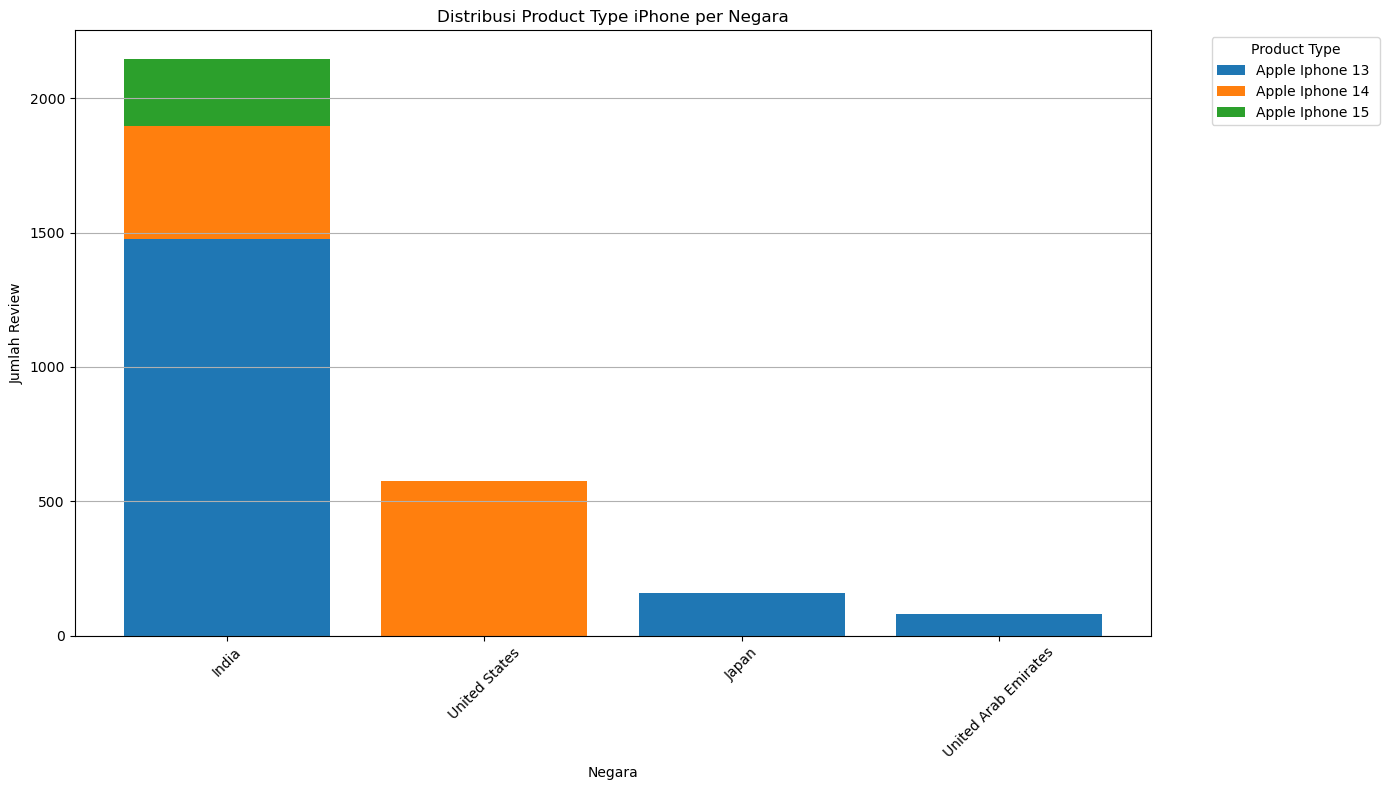

In [ ]:
# Grouping dan pivot
review_counts = df.groupby(['country', 'productType']).size().reset_index(name='review_count')
pivot_table = review_counts.pivot(index='country', columns='productType', values='review_count').fillna(0)

top_countries = pivot_table.sum(axis=1).sort_values(ascending=False).head(10).index
pivot_top = pivot_table.loc[top_countries]

# Plot stacked bar chart
plt.figure(figsize=(14, 8))
bottom = np.zeros(len(pivot_top))

for column in pivot_top.columns:
    plt.bar(pivot_top.index, pivot_top[column], bottom=bottom, label=column)
    bottom += pivot_top[column].values

plt.title("Distribusi Product Type iPhone per Negara")
plt.xlabel("Negara")
plt.ylabel("Jumlah Review")
plt.xticks(rotation=45)
plt.legend(title="Product Type", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(axis='y')
plt.tight_layout()
plt.show()

Pada analisis dapat dilihat bahwa iPhone 13 memiliki jumlah review terbanyak yang berasal dari India, diikuti oleh Jepang dan Uni Emirat Arab. Hal ini dapat terjadi karena iPhone 13 telah beredar lebih lama di pasar global sejak peluncurannya pada September 2021. Dan juga mulai diproduksi secara lokal di India pada awal 2022, yang memungkinkan distribusi lebih luas serta harga yang lebih kompetitif bagi konsumen lokal (Menurut Tempo.co). Ketersediaan yang tinggi serta aksesibilitas produk di India bisa menjadi faktor yang mendorong lebih banyak pengguna untuk menulis review, sehingga menghasilkan dominasi jumlah review dari negara tersebut.

Sementara itu, iPhone 14 menunjukkan jumlah ulasan terbanyak berasal dari Amerika Serikat, disusul oleh India. Hal ini selaras dengan posisi Amerika Serikat sebagai pasar utama Apple, di mana produk-produk terbaru umumnya diadopsi lebih awal dan ulasan lebih cepat bermunculan setelah rilis

# **Distribusi rating tiap iPhone**

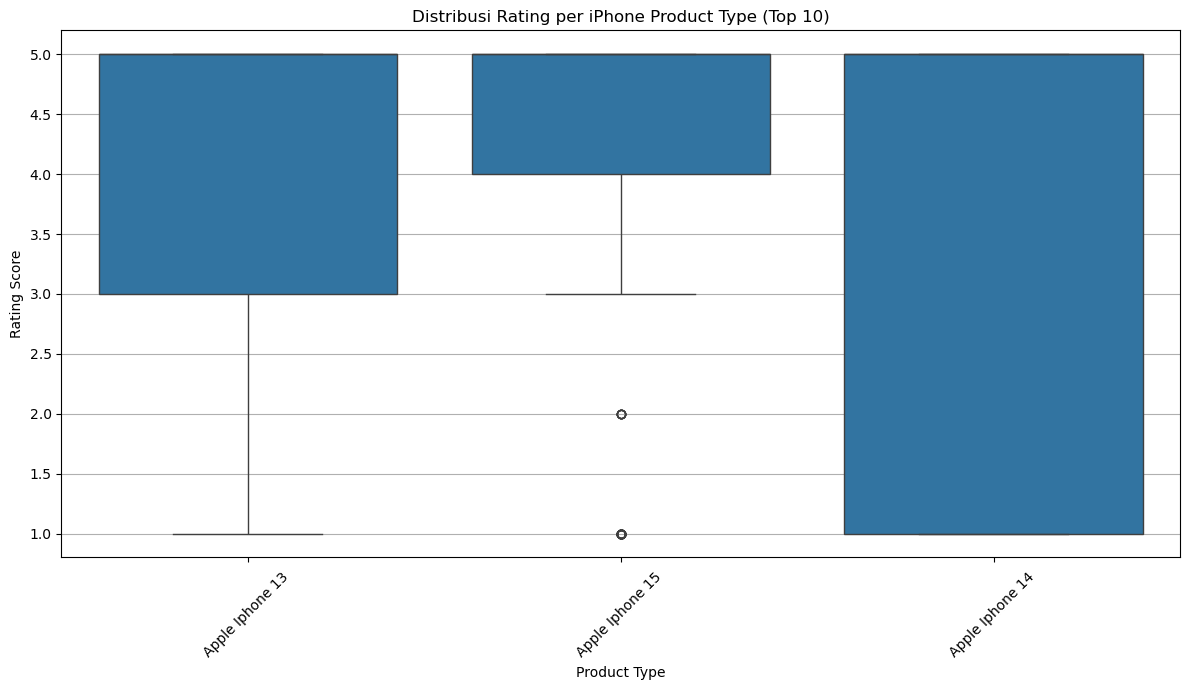

In [ ]:
# Distribusi rating iphone
top_product_types = df['productType'].value_counts().head(10).index.tolist()
filtered_df = df[df['productType'].isin(top_product_types)]

# Plot boxplot
plt.figure(figsize=(12, 7))
sns.boxplot(data=filtered_df, x='productType', y='ratingScore')
plt.title("Distribusi Rating per iPhone Product Type (Top 10)")
plt.xlabel("Product Type")
plt.ylabel("Rating Score")
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

Distribusi rating Iphone 13 berkisar di antara rating 3 - 5 hal ini mengindikasikan bahwa reviewer merasa tingkat kepuasan atau persetujuan yang positif atau memadai terhadap Iphone 13 (menurut DQLab). Sementara untuk Iphone 15 distribusi rating berada pada rentang 4 - 5 lebih tinggi dari Iphone 13 sedangkan untuk Iphone 14 distribusi rating berada pada semua rating yaitu 1-5.   

## **8. Analisis Panjang Review**

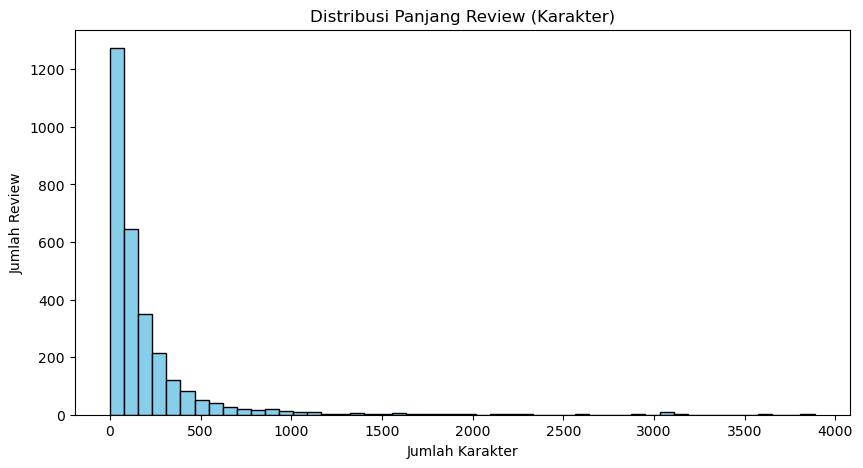

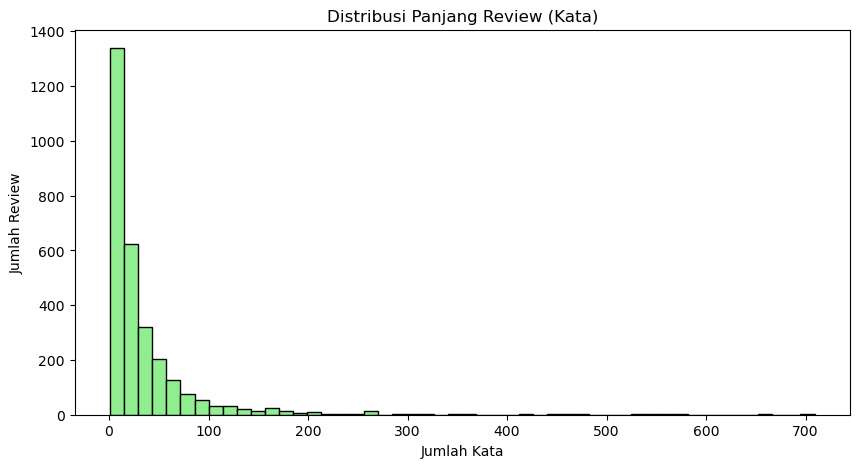

In [40]:
# Jumlah karakter
df["review_char_length"] = df["reviewDescription"].astype(str).apply(len)

# Jumlah kata
df["review_word_count"] = df["reviewDescription"].astype(str).apply(lambda x: len(x.split()))
df[["review_char_length", "review_word_count"]].describe()

# Histogram panjang karakter
plt.figure(figsize=(10, 5))
plt.hist(df["review_char_length"], bins=50, color='skyblue', edgecolor='black')
plt.title("Distribusi Panjang Review (Karakter)")
plt.xlabel("Jumlah Karakter")
plt.ylabel("Jumlah Review")
plt.show()

# Histogram jumlah kata
plt.figure(figsize=(10, 5))
plt.hist(df["review_word_count"], bins=50, color='lightgreen', edgecolor='black')
plt.title("Distribusi Panjang Review (Kata)")
plt.xlabel("Jumlah Kata")
plt.ylabel("Jumlah Review")
plt.show()

tambahin tabel kata yang panjang 5 dan pendek

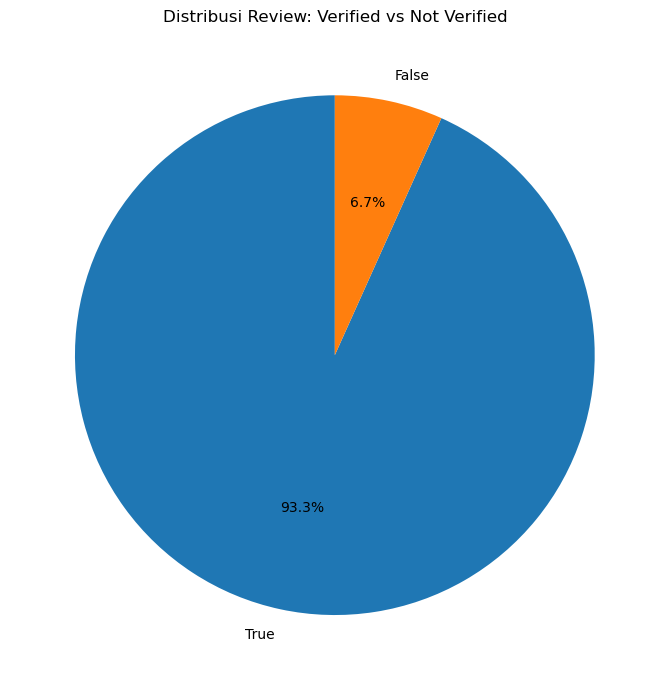

In [35]:
# Hitung distribusi review berdasarkan status verifikasi (isVerified)
verified_counts = df['isVerified'].value_counts().reset_index()
verified_counts.columns = ['verified_status', 'review_count']

# Plot pie chart
plt.figure(figsize=(7, 7))
plt.pie(verified_counts['review_count'], labels=verified_counts['verified_status'], autopct='%1.1f%%', startangle=90)
plt.title("Distribusi Review: Verified vs Not Verified")
plt.tight_layout()
plt.show()

Hasil analisis menunjukkan bahwa sekitar 93,3% pengguna yang memberikan ulasan merupakan akun yang telah terverifikasi. Artinya, mayoritas review yang ditampilkan dapat dianggap lebih kredibel dan dapat dipercaya. Hal ini sejalan dengan pernyataan **Bharat Singh**, seorang SPS di Amazon, yang menyebutkan bahwa:

    “Seseorang hanya dapat menulis ulasan terverifikasi jika benar-benar melakukan pembelian produk tersebut terlebih dahulu. Hanya Amazon yang dapat memverifikasi ulasan ini, dan reviewer harus memenuhi syarat tertentu yang telah ditetapkan oleh Amazon agar review-nya dapat diberi label 'verified review'.”

Dengan demikian, proporsi ulasan yang tinggi dari akun terverifikasi menjadi indikasi positif bahwa mayoritas feedback berasal dari pembeli yang sah dan relevan.